In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# The data is stored in the directory 'data_modules'
path = './data/'

# Read the data using read_csv
apple_price_data = pd.read_csv(path + 'AAPL.csv', index_col=0)

# Set the index to a datetime object
apple_price_data.index = pd.to_datetime(apple_price_data.index)

In [20]:
# Display the last five rows
# You can also check the first five rows 
apple_price_data.tail()

apple_price_data.head()

,close,high,low,open,volume
date,,,,,
2016-01-04 09:30:00+00:00,498.89,499.73,498.81,499.545,1010884.0
2016-01-04 09:45:00+00:00,102.70,102.84,102.68,102.780,137361.0
2016-01-04 10:00:00+00:00,102.97,102.98,102.83,102.930,166398.0
2016-01-04 10:15:00+00:00,103.28,103.39,103.09,103.230,138105.0
2016-01-04 10:30:00+00:00,103.51,103.55,103.29,103.350,212347.0


In [21]:
# Display the concise summary of the data
apple_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30137 entries, 2016-01-04 09:30:00+00:00 to 2020-08-28 15:45:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   30133 non-null  float64
 1   high    30137 non-null  float64
 2   low     30137 non-null  float64
 3   open    30137 non-null  float64
 4   volume  30137 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [22]:
# Display the count of null values
apple_price_data.isna().sum()

close     4
high      0
low       0
open      0
volume    0
dtype: int64

In [23]:
# Drop the missing values
apple_price_data.dropna(inplace=True)

# Print the number of rows in the dataframe
print('Number of rows: ', apple_price_data.shape[0])

# Display the count of null values
apple_price_data.isna().sum()

Number of rows:  30133


close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [24]:
# You can use duplicated().value_counts() to check the count of duplicate values.

# Display the count of duplicate values
print(apple_price_data.duplicated().value_counts())
print('Proportion of duplicate values is {}.'.format( 
      round(apple_price_data.duplicated().value_counts()[1]/apple_price_data.shape[0],
            4)))

False    29918
True       215
Name: count, dtype: int64
Proportion of duplicate values is 0.0071.


In [25]:
# Drop the consecutive duplicate values
apple_price_data = apple_price_data.loc[(apple_price_data['close'].diff() != 0) | 
                                        (apple_price_data['open'].diff() != 0) |
                                        (apple_price_data['high'].diff() != 0) |
                                        (apple_price_data['low'].diff() != 0)]

# Check the number of rows
print("Number of rows: ", apple_price_data.shape[0])

Number of rows:  29927


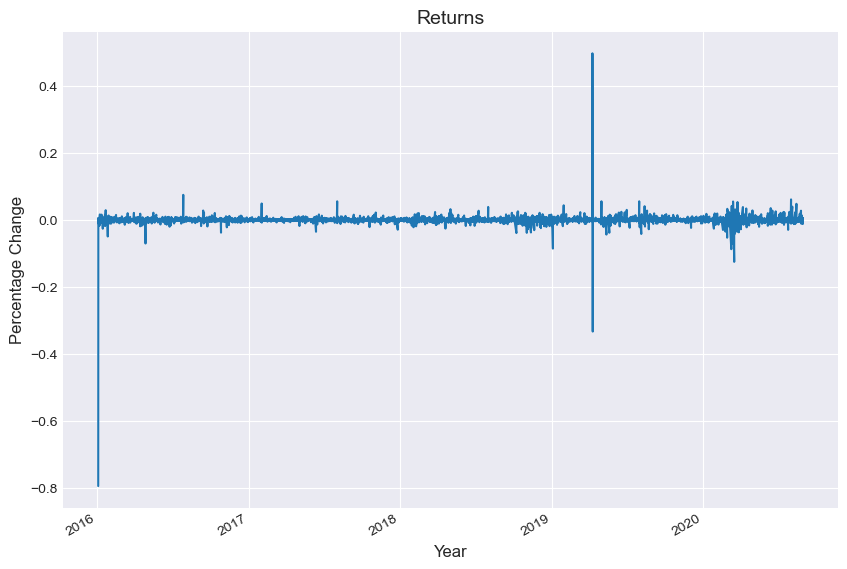

In [26]:
# Outliers are values that are unusually large or small for the column. 
# There are multiple ways to visualise them. You can calculate the percentage change and plot a graph of the change. 
# If the change is too big, it suggests an outlier.

# Calculate the percentage change
apple_price_data['returns'] = apple_price_data['close'].pct_change()

# Plot the percentage change
plt.figure(figsize=(10,7))
apple_price_data['returns'].plot()
# Set the title and axes label
plt.title('Returns', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)
# Show the plot
plt.show()